# Homework 5. Pandas - Titanic

***Double Click here to edit this cell***

- Name: 윤다영
- Student ID: 202002265

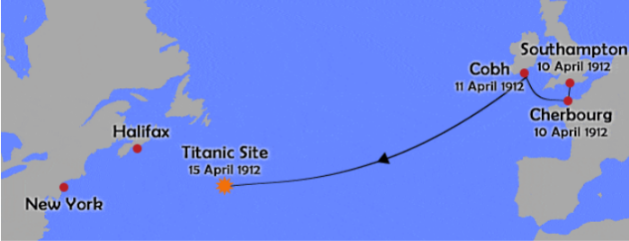

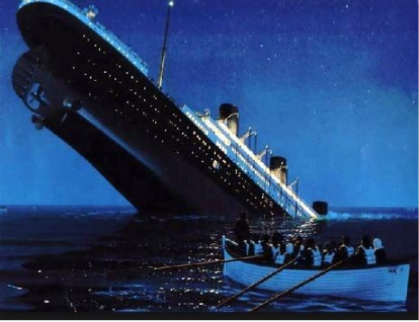

In [ ]:
import pandas as pd

In [5]:
titanic = pd.read_csv('/titanic_dataset.csv')

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- name: Name 
- sex: {'male', 'female'} 
- age: Age
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
- boat: boat # of survived passengers

## Some Exercises

### You should find pandas functions by googling or from pandas reference manual

In [6]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [7]:
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [8]:
titanic.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [9]:
titanic[['boat']].head(10)

,boat
0,2
1,11
2,NaN
3,NaN
4,NaN
5,3
6,10
7,NaN
8,D
9,NaN


In [10]:
titanic[titanic['boat'].notnull()]['boat'].value_counts().sort_index()

1           5
10         29
11         25
12         19
13         39
13 15       2
13 15 B     1
14         33
15         37
15 16       1
16         23
2          13
3          26
4          31
5          27
5 7         2
5 9         1
6          20
7          23
8          23
8 10        1
9          25
A          11
B           9
C          38
C D         2
D          20
Name: boat, dtype: int64

Remove all passengers who were in more than one boat. They are unclear data.

In [11]:
exactly_one = lambda x: len(str(x).strip().split()) == 1

titanic[(titanic['boat'].notnull()) & titanic['boat'].apply(exactly_one)]['boat'].value_counts().sort_index()

1      5
10    29
11    25
12    19
13    39
14    33
15    37
16    23
2     13
3     26
4     31
5     27
6     20
7     23
8     23
9     25
A     11
B      9
C     38
D     20
Name: boat, dtype: int64

## Problem 1. Find mean fare that the first class passengers paid (5 pts)
- Note that there are many unpaid free passengers. They are out of consideration.
- 1 pound when Titanic launched is worth 57.5 US dollars. 
- Suppose US currency exchange ratio is 1,280 won per dollar.
- Before printing, truncate to two decimal places

In [12]:
# YOUR CODE HERE
paid = round(titanic[(titanic['pclass'] == 1) & (titanic['fare'] > 0)].mean()['fare'] * 57.5 * 1280, 2)
print("mean fare that the first class passengers paid =",paid)

mean fare that the first class passengers paid = 6583334.67


<ipython-input-12-9dc5c52bfd06>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  paid = round(titanic[(titanic['pclass'] == 1) & (titanic['fare'] > 0)].mean()['fare'] * 57.5 * 1280, 2)


```
mean fare that the first class passengers paid = 6583334.67
```

## Problem 2. (15 pts)
### 2.1 Find the **name**s who paid the highest **fare**. Are they **survived**?

In [13]:
# YOUR CODE HERE
print(titanic.loc[titanic['fare'] == titanic['fare'].max(), ['name', 'survived']])

                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1


```
                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1
```

### 2.2 Find the **name**s who paid the lowest **fare**. Are they **survived**?

In [14]:
# YOUR CODE HERE
print(titanic.loc[titanic['fare'] == titanic['fare'].min(), ['name', 'pclass', 'survived']])

                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963     

```
                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963                     Leonard, Mr. Lionel       3         0
1254           Tornquist, Mr. William Henry       3         1
```

### 2.3 Find the **name**s who paid the lowest **fare** (> 0). Are they **survived**?

In [15]:
# YOUR CODE HERE
lowestFare = titanic[titanic['fare'] > 0]
print(lowestFare.loc[lowestFare['fare'] == lowestFare['fare'].min(), ['name', 'pclass', 'survived']])

                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1


```
                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1
```

## Problem 3. (10 pts)
### 3.1 Find the survival ratio of the passengers who paid more than 0 and less than or equal to the mean fare of third class

In [16]:
# YOUR CODE HERE
third = titanic[(titanic['pclass'] == 3) & (titanic['fare'] > 0)]['fare'].mean()
ans = titanic[(titanic['fare'] <= third) & (titanic['fare'] > 0)]
print(f"survival ratio of low 1 group = {round(len(ans[ans['survived'] == 1]) / len(ans) * 100, 2)}%")

survival ratio of low 1 group = 25.33%


```
survival ratio of low 1 group = 25.33%
```

### 3.2 Find the survival ratio of the passengers who paid more than the mean fare of first class

In [17]:
# YOUR CODE HERE
first = titanic[titanic['pclass'] == 1]['fare'].mean()
ans = titanic[titanic['fare'] > first]
print(f"survival ratio of high 1 group = {round(len(ans[ans['survived'] == 1]) / len(ans) * 100, 2)}%")

survival ratio of high 1 group = 72.16%


```
survival ratio of high 1 group = 72.16%
```

## Problem 4. (10 pts)
### 4.1 Plot the number of male and female passengers

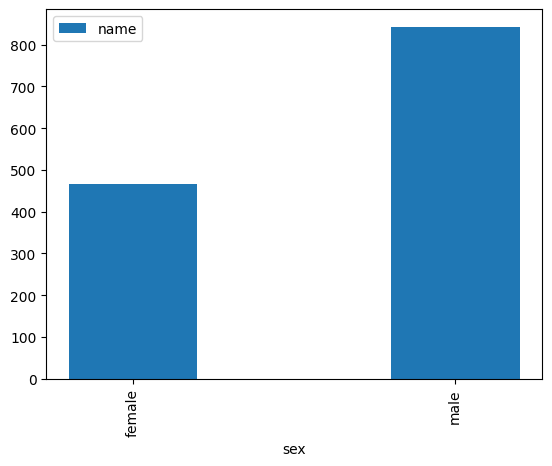

In [18]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
female = titanic[titanic['sex'] == "female"]
male = titanic[titanic['sex'] == "male"]
plt.bar(["female", "male"], [len(female), len(male)], label = "name", width = 0.4)
plt.xlabel("sex")
plt.xticks(rotation = 90)
plt.legend(loc = 2)
plt.show()

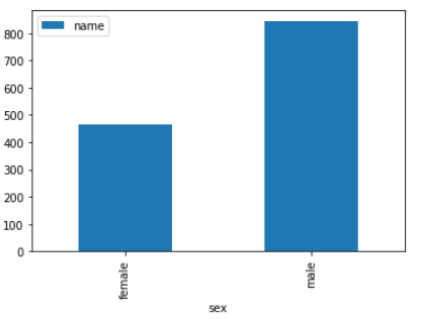

### 4.2 Plot mean age and mean fare by sex

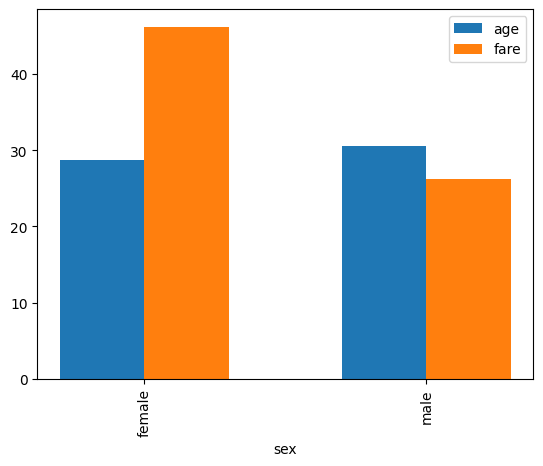

In [19]:
# YOUR CODE HERE
femaleMeanAge = female['age'].mean()
maleMeanAge = male['age'].mean()
femaleMeanFare = female['fare'].mean()
maleMeanFare = male['fare'].mean()
plt.bar([-0.15, 0.85], [femaleMeanAge, maleMeanAge], label = "age", width = 0.3)
plt.bar([0.15, 1.15], [femaleMeanFare, maleMeanFare], label = "fare", width = 0.3)
plt.xlabel("sex")
plt.xticks([0, 1], ["female", "male"], rotation = 90)
plt.legend(loc = 1)
plt.show()

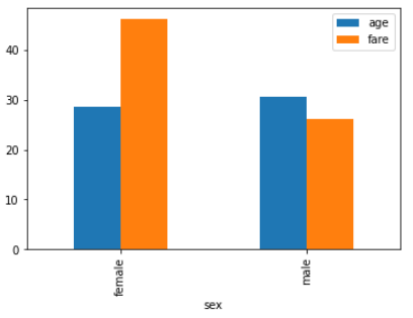

## Problem 5. (10 pts)
### 5.1 Find the number of passengers by passenger's title.

In [20]:
# YOUR CODE HERE
passenTitle = lambda name: (name.split(',')[1].strip().split('.')[0] + '.').split(' ')[-1]
titanic2 = pd.read_csv('/titanic_dataset.csv')
titanic2['name'] = titanic['name'].apply(passenTitle)
print(titanic2['name'].value_counts())

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Capt.          1
Sir.           1
Dona.          1
Jonkheer.      1
Countess.      1
Don.           1
Mme.           1
Lady.          1
Name: name, dtype: int64


```
 Mr.          757
 Miss.        260
 Mrs.         197
 Master.       61
 Rev.           8
 Dr.            8
 Col.           4
 Ms.            2
 Mlle.          2
 Major.         2
 Jonkheer.      1
 Sir.           1
 Capt.          1
 Countess.      1
 Lady.          1
 Don.           1
 Mme.           1
 Dona.          1
Name: name, dtype: int64
```

### 5.2 Plot the mean fare by passenger's title

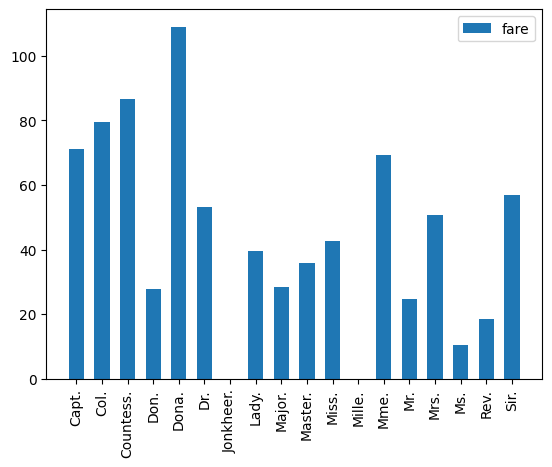

In [21]:
# YOUR CODE HERE
xticks = ['Capt.', 'Col.', 'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Master.', 'Miss.', 'Mille.', 'Mme.', 'Mr.','Mrs.','Ms.','Rev.','Sir.']
fareMeanWithTitles = [titanic2[titanic2['name'] == title]['fare'].mean() for title in xticks]
plt.bar(range(len(xticks)), fareMeanWithTitles, width = 0.6, label = "fare")
plt.xticks(range(len(xticks)), xticks, rotation = 90)
plt.legend(loc = 1)
plt.show()

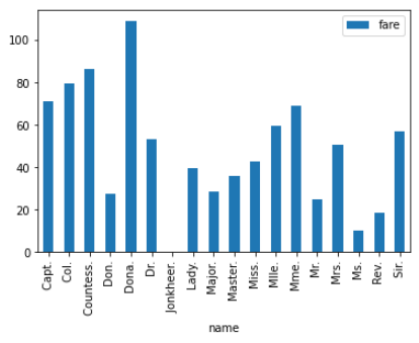

## Problem 6. (15 pts)
### Compute the confidence and support for the following cases:

Confidences:
- P(survived = 1 | sex=female, pclass=1)
- P(survived = 1 | sex=female, pclass=2)
- P(survived = 1 | sex=female, pclass=3)
- P(survived = 1 | sex=male, pclass=1)
- P(survived = 1 | sex=male, pclass=2)
- P(survived = 1 | sex=male, pclass=3)
- P(survived = 1 | age <= 10, pclass=1)
- P(survived = 1 | age <= 10, pclass=2)
- P(survived = 1 | age <= 10, pclass=3)

Support:
- P(survived = 1, sex=female, pclass=1)
- P(survived = 1, sex=female, pclass=2)
- P(survived = 1, sex=female, pclass=3)
- P(survived = 1, sex=male, pclass=1)
- P(survived = 1, sex=male, pclass=2)
- P(survived = 1, sex=male, pclass=3)
- P(survived = 1, age <= 10, pclass=1)
- P(survived = 1, age <= 10, pclass=2)
- P(survived = 1, age <= 10, pclass=3)

### 6.1 P(survived = 1 | sex=female, pclass=1), P(survived = 1, sex=female, pclass=1)

In [24]:
# YOUR CODE HERE
firstClassFemale = titanic[(titanic['sex'] == "female") & (titanic["pclass"] == 1)]
survivedFF = titanic[(titanic['sex'] == "female") & (titanic["pclass"] == 1) & (titanic["survived"])]
print(f"Confidence: P(survived = 1 | sex=female, pclass=1) = {round(len(survivedFF)/len(firstClassFemale) * 100,2)} %")
print(f"Support: P(survived = 1, sex=female, pclass=1) = {round(len(survivedFF)/len(titanic) * 100 , 2)}%")

Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53 %
Support: P(survived = 1, sex=female, pclass=1) = 10.62%


```
Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53%
Support: P(survived = 1, sex=female, pclass=1) = 10.62%
```

### 6.2 P(survived = 1 | sex=female, pclass=2), P(survived = 1, sex=female, pclass=2)

In [26]:
# YOUR CODE HERE
secondClassFemale = titanic[(titanic['sex'] == "female") & (titanic["pclass"] == 2)]
survivedSF = titanic[(titanic['sex'] == "female") & (titanic["pclass"] == 2) & (titanic["survived"])]
print(f"Confidence: P(survived = 1 | sex=female, pclass=2) = {round(len(survivedSF)/len(secondClassFemale) * 100 ,2)}%")
print(f"Support: P(survived = 1, sex=female, pclass=2) = {round(len(survivedSF)/len(titanic) * 100, 2)}%")

Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68%
Support: P(survived = 1, sex=female, pclass=2) = 7.18%


```
Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68%
Support: P(survived = 1, sex=female, pclass=2) = 7.18%
```

### 6.3 P(survived = 1 | sex=female, pclass=3), P(survived = 1, sex=female, pclass=3)

In [31]:
# YOUR CODE HERE
thirdClassFemale = titanic[(titanic['sex'] == "female") & (titanic["pclass"] == 3)]
survivedTF = titanic[(titanic['sex'] == "female") & (titanic["pclass"] == 3) & (titanic["survived"])]
print(f"Confidence: P(survived = 1 | sex=female, pclass=3) = {round(len(survivedTF)/len(thirdClassFemale)*100 , 2)} %")
print(f"Support: P(survived = 1, sex=female, pclass=3) = {round(len(survivedTF)/len(titanic) * 100, 2)} %")

Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07 %
Support: P(survived = 1, sex=female, pclass=3) = 8.1 %


```
Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07%
Support: P(survived = 1, sex=female, pclass=3) = 8.10%
```

### 6.4 P(survived = 1 | sex=male, pclass=1), P(survived = 1, sex=male, pclass=1)

In [28]:
# YOUR CODE HERE
firstClassMale = titanic[(titanic['sex'] == "male") & (titanic["pclass"] == 1)]
survivedFM = titanic[(titanic['sex'] == "male") & (titanic["pclass"] == 1) & (titanic["survived"] == 1)]
print(f"Confidence: P(survived = 1 | sex=male, pclass=1) = {round(len(survivedFM)/len(firstClassMale) * 100 ,2)}%")
print(f"Support: P(survived = 1, sex=male, pclass=1) = {round(len(survivedFM)/len(titanic) * 100, 2)}%")

Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08 %
Support: P(survived = 1, sex=male, pclass=1) = 4.66 %


```
Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08%
Support: P(survived = 1, sex=male, pclass=1) = 4.66%
```

### 6.5 P(survived = 1 | sex=male, pclass=2), P(survived = 1, sex=male, pclass=2)

In [32]:
# YOUR CODE HERE
secondClassMale = titanic[(titanic['sex'] == "male") & (titanic["pclass"] == 2)]
survivedSM = titanic[(titanic['sex'] == "male") & (titanic["pclass"] == 2) & (titanic["survived"] == 1 )]
print(f"Confidence: P(survived = 1 | sex=male, pclass=2) = {round(len(survivedSM)/len(secondClassMale) * 100 , 2)}%")
print(f"Support: P(survived = 1, sex=male, pclass=2) = {round(len(survivedSM)/len(titanic) * 100, 2)}%")

Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62 %
Support: P(survived = 1, sex=male, pclass=2) = 1.91 %


```
Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62%
Support: P(survived = 1, sex=male, pclass=2) = 1.91%
```

### 6.6 P(survived = 1 | sex=male, pclass=3), P(survived = 1, sex=male, pclass=3)

In [33]:
# YOUR CODE HERE
thirdClassMale = titanic[(titanic['sex'] == "male") & (titanic["pclass"] == 3)]
survivedTM = titanic[(titanic['sex'] == "male") & (titanic["pclass"] == 3) & (titanic["survived"] == 1)]
print(f"Confidence: P(survived = 1 | sex=female, pclass=3) = {round(len(survivedTM)/len(thirdClassMale) * 100 , 2)}%")
print(f"Support: P(survived = 1, sex=female, pclass=3) = {round(len(survivedTM)/len(titanic) * 100, 2)}%")

Confidence: P(survived = 1 | sex=female, pclass=3) = 15.21%
Support: P(survived = 1, sex=female, pclass=3) = 5.73%


```
Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21%
Support: P(survived = 1, sex=male, pclass=3) = 5.73%
```

### 6.7 P(survived = 1 | age <= 10, pclass=1), P(survived = 1,  age <= 10, pclass=1)

In [34]:
# YOUR CODE HERE
denominator = titanic[(titanic['age'] <= 10) & (titanic["pclass"] == 1)]
numerator = titanic[(titanic['age'] <= 10) & (titanic["pclass"] == 1) & (titanic["survived"] == 1)]
print(f"Confidence: P(survived = 1 | age <= 10, pclass=1) = {round(len(numerator)/len(denominator) *100 , 2)}%")
print(f"P(survived = 1, age <= 10, pclass=1) = {round(len(numerator)/len(titanic) * 100, 2)}%")

Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.0%
P(survived = 1, age <= 10, pclass=1) = 0.23%


```
Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00%
Support: P(survived = 1, age <= 10, pclass=1) = 0.23%
```

### 6.8 P(survived = 1 | age <= 10, pclass=2), P(survived = 1,  age <= 10, pclass=2)

In [35]:
# YOUR CODE HERE
denominator = titanic[(titanic['age'] <= 10) & (titanic["pclass"] == 2)]
numerator = titanic[(titanic['age'] <= 10) & (titanic["pclass"] == 2) & (titanic["survived"] == 1)]
print(f"Confidence: P(survived = 1 | age <= 10, pclass=2) = {round(len(numerator)/len(denominator) *100, 2)}%")
print(f"P(survived = 1, age <= 10, pclass=2) = {round(len(numerator)/len(titanic) * 100, 2)}%")

Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.0%
P(survived = 1, age <= 10, pclass=2) = 1.68%


```
Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00%
Support: P(survived = 1, age <= 10, pclass=2) = 1.68%
```

### 6.9 P(survived = 1 | age <= 10, pclass=3), P(survived = 1,  age <= 10, pclass=3)

In [36]:
# YOUR CODE HERE
denominator = titanic[(titanic['age'] <= 10) & (titanic["pclass"] == 3)]
numerator = titanic[(titanic['age'] <= 10) & (titanic["pclass"] == 3) & (titanic["survived"] == 1)]
print(f"Confidence: P(survived = 1 | age <= 10, pclass=3) = {round(len(numerator)/len(denominator) * 100 , 2)}%")
print(f"P(survived = 1, age <= 10, pclass=3) = {round(len(numerator)/len(titanic) * 100, 2)}%")

Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67%
P(survived = 1, age <= 10, pclass=3) = 1.91%


```
Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67%
Support: P(survived = 1, age <= 10, pclass=3) = 1.91%
```

### 6.10 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)



## Problem 7. (10 pts)
### 7.1 Plot numbers of survived and numbers of dead by passenger classes

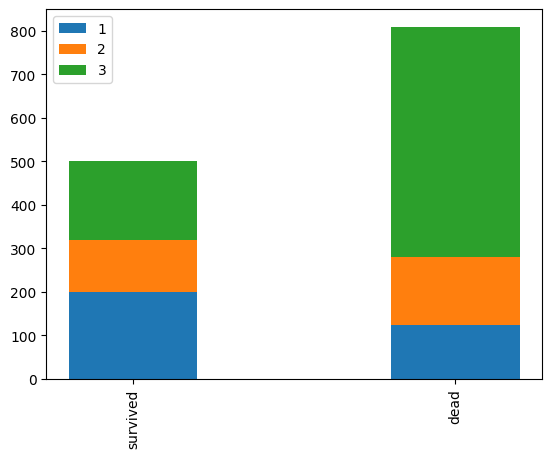

In [37]:
# YOUR CODE HERE
survivedF = len(titanic[(titanic['pclass'] == 1) & (titanic['survived'] == 1)])
survivedS = len(titanic[(titanic['pclass'] == 2) & (titanic['survived'] == 1)])
survivedT = len(titanic[(titanic['pclass'] == 3) & (titanic['survived'] == 1)])
DeadF = len(titanic[(titanic['pclass'] == 1) & (titanic['survived'] == 0)])
DeadS = len(titanic[(titanic['pclass'] == 2) & (titanic['survived'] == 0)])
DeadT = len(titanic[(titanic['pclass'] == 3) & (titanic['survived'] == 0)])
plt.bar([0, 1], [survivedF, DeadF], label = "1", width = 0.4)
plt.bar([0, 1], [survivedS, DeadS], bottom = [survivedF, DeadF], label = "2", width = 0.4)
plt.bar([0, 1], [survivedT, DeadT], bottom = [survivedF + survivedS, DeadF + DeadS], label = "3", width = 0.4)
plt.legend(loc = 0)
plt.xticks([0, 1], ['survived', 'dead'], rotation = 90)
plt.show()

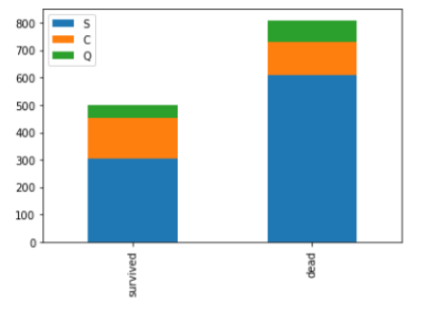

### 7.2 Plot numbers of survived and numbers of dead by passenger age intervals
-  0:   0 $\le$ age $\lt$ 20
- 20: 20 $\le$ age $\lt$ 40
- 40: 40 $\le$ age $\lt$ 60
- 60: 60 $\le$ age $\lt$ 80
- 80: 80 $\le$ age

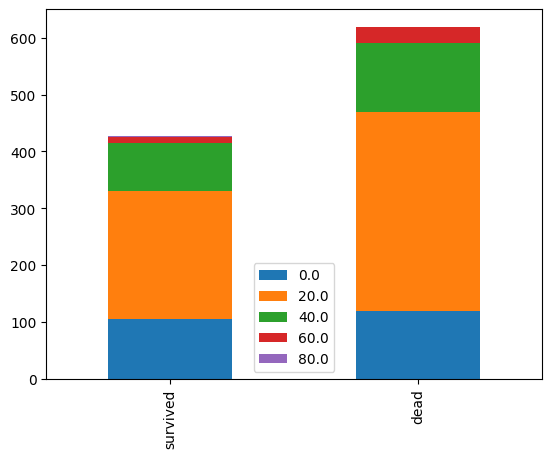

In [38]:
# YOUR CODE HERE
s0 = len(titanic[(titanic['age'] < 20) & (titanic['survived'] == 1)])
s20 = len(titanic[(titanic['age'] >= 20) & (titanic['age'] < 40) & (titanic['survived'] == 1)])
s40 = len(titanic[(titanic['age'] >= 40) & (titanic['age'] < 60) & (titanic['survived'] == 1)])
s60 = len(titanic[(titanic['age'] >= 60) & (titanic['age'] < 80) & (titanic['survived'] == 1)])
s80 = len(titanic[(titanic['age'] >= 80) & (titanic['survived'] == 1)])
d0 = len(titanic[(titanic['age'] < 20) & (titanic['survived'] == 0)])
d20 = len(titanic[(titanic['age'] >= 20) & (titanic['age'] < 40) & (titanic['survived'] == 0)])
d40 = len(titanic[(titanic['age'] >= 40) & (titanic['age'] < 60) & (titanic['survived'] == 0)])
d60 = len(titanic[(titanic['age'] >= 60) & (titanic['age'] < 80) & (titanic['survived'] == 0)])
d80 = len(titanic[(titanic['age'] >= 80) & (titanic['survived'] == 0)])
store = [0, 0]
plt.bar([0, 1], [s0, d0], label = "0.0", width = 0.5)
store[0] += s0
store[1] += d0
plt.bar([0, 1], [s20, d20], label = "20.0", width = 0.5, bottom = store)
store[0] += s20
store[1] += d20
plt.bar([0, 1], [s40, d40], label = "40.0", width = 0.5, bottom = store)
store[0] += s40
store[1] += d40
plt.bar([0, 1], [s60, d60], label = "60.0", width = 0.5, bottom = store)
store[0] += s60
store[1] += d60
plt.bar([0, 1], [s80, d80], label = "80.0", width = 0.5, bottom = store)
store[0] += s80
store[1] += d80
plt.xticks([0, 1], ["survived", "dead"], rotation = 90)
plt.axis([-0.5, 1.5, 0, 650])
plt.legend(loc = 8)
plt.show()

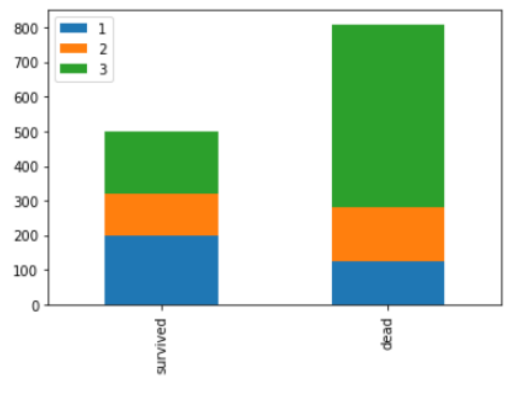

### 7.3 Plot numbers of survived and numbers of dead by the ports passenger embarked at

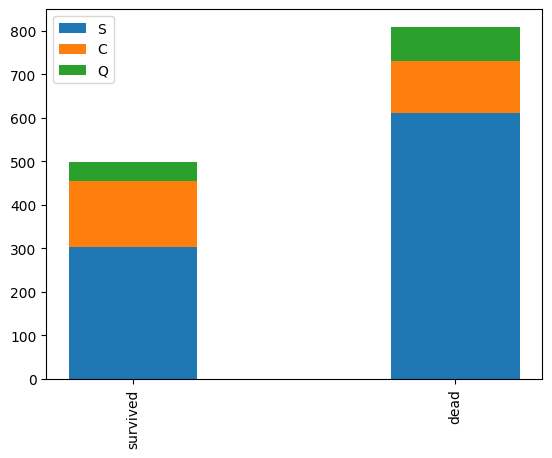

In [40]:
# YOUR CODE HERE
survivedS = len(titanic[(titanic['survived'] == 1) & (titanic['embarked'] == "S")])
survivedC = len(titanic[(titanic['survived'] == 1) & (titanic['embarked'] == "C")])
survivedQ = len(titanic[(titanic['survived'] == 1) & (titanic['embarked'] == "Q")])
deadS = len(titanic[(titanic['survived'] == 0) & (titanic['embarked'] == "S")])
deadC = len(titanic[(titanic['survived'] == 0) & (titanic['embarked'] == "C")])
deadQ = len(titanic[(titanic['survived'] == 0) & (titanic['embarked'] == "Q")])
plt.bar([0, 1], [survivedS, deadS], label = "S", width = 0.4)
plt.bar([0, 1], [survivedC, deadC], bottom = [survivedS, deadS], label = "C", width = 0.4)
plt.bar([0, 1], [survivedQ, deadQ], bottom = [survivedS + survivedC, deadS + deadC], label = "Q", width = 0.4)
plt.legend(loc = 0)
plt.xticks([0, 1], ['survived', 'dead'], rotation = 90)
plt.show()

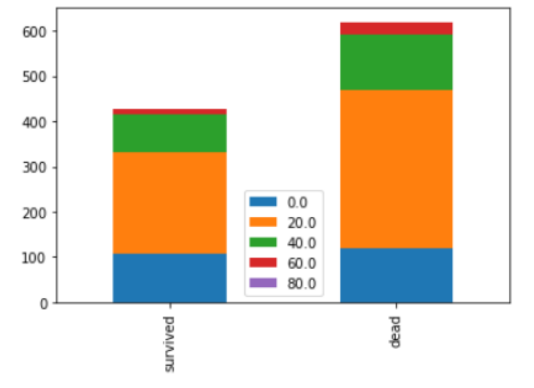

### 7.4 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)
<br>
위와 같이 bar chart에서 살아남은 사람과 살아남지 못한 사람들의 비율을 나타내고, 그 중에서도 살아남은 사람
들 중 어떤 특징을 가진 사람들의 비율, 살아남지 못한 사람들 중 어떤 특징을 가진 사람들의 비율을 매우 시각적
으로 나타낼 수 있는 방법을 공부하게 되었다. 앞으로도 이런 매우 많은 양의 데이터를 다룰 때 이번 과제에서 배
웠던 것처럼 가시적으로 나타낼 수 있게 하는 것이 좋다고 생각하게 되었다.


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_5_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills